In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


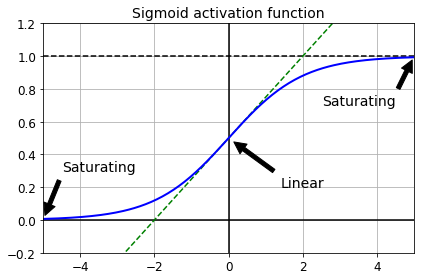

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

In [2]:
import tensorflow as tf

In [28]:
def leaky_relu(z, alpha = 0.01):
    return np.maximum(alpha * z, z)

Saving figure leaky_relu_plot


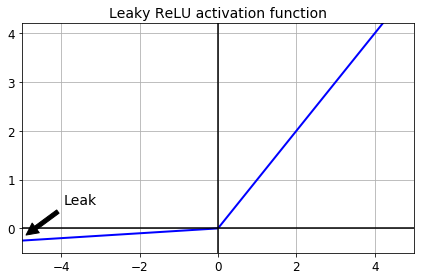

In [6]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [35]:
import tensorflow as tf
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [36]:
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

In [37]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.leaky_relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.leaky_relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [38]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')

In [39]:
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    training_op = optimizer.minimize(loss)

In [40]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [41]:
init = tf.global_variables_initializer()

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [43]:
n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_test = accuracy.eval(feed_dict={X: mnist.validation.images, y: mnist.validation.labels})
            print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_test)

0 Batch accuracy: 0.86 Validation accuracy: 0.9022
5 Batch accuracy: 0.9 Validation accuracy: 0.9436
10 Batch accuracy: 0.96 Validation accuracy: 0.9598
15 Batch accuracy: 1.0 Validation accuracy: 0.9662
20 Batch accuracy: 1.0 Validation accuracy: 0.9698
25 Batch accuracy: 1.0 Validation accuracy: 0.9738
30 Batch accuracy: 1.0 Validation accuracy: 0.9754
35 Batch accuracy: 0.96 Validation accuracy: 0.9758


In [45]:
def elu(z, alpha = 1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


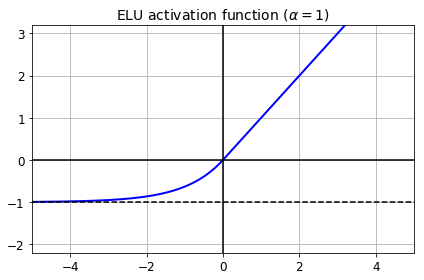

In [46]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [48]:
reset_graph()

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')

In [49]:
hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.elu, name = 'hidden1')

In [50]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

Saving figure selu_plot


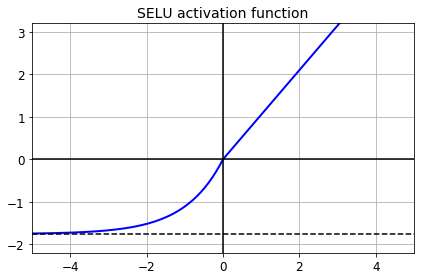

In [51]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

In [53]:
np.random.seed(42)

Z = np.random.normal(size = (500, 100))

for layer in range(100):
    W = np.random.normal(size = (100, 100), scale = np.sqrt(1 / 100))
    Z = selu(np.dot(Z, W))
    
    means = np.mean(Z, axis = 1)
    stds = np.std(Z, axis = 1)
    
    if layer % 10 == 0:
        print("Layer {}: {:.2f} < mean < {:.2f}, {:.2f} < std deviation < {:.2f}".format(
            layer, means.min(), means.max(), stds.min(), stds.max()))

Layer 0: -0.26 < mean < 0.27, 0.74 < std deviation < 1.27
Layer 10: -0.24 < mean < 0.27, 0.74 < std deviation < 1.27
Layer 20: -0.17 < mean < 0.18, 0.74 < std deviation < 1.24
Layer 30: -0.27 < mean < 0.24, 0.78 < std deviation < 1.20
Layer 40: -0.38 < mean < 0.39, 0.74 < std deviation < 1.25
Layer 50: -0.27 < mean < 0.31, 0.73 < std deviation < 1.27
Layer 60: -0.26 < mean < 0.43, 0.74 < std deviation < 1.35
Layer 70: -0.19 < mean < 0.21, 0.75 < std deviation < 1.21
Layer 80: -0.18 < mean < 0.16, 0.72 < std deviation < 1.19
Layer 90: -0.19 < mean < 0.16, 0.75 < std deviation < 1.20


In [56]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.selu, name = 'hidden1')
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.selu, name = 'hidden2')
    logits = tf.layers.dense(hidden2, n_outputs, name = 'outputs')
    
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')
    
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()

n_epochs = 40
batch_size = 50

In [59]:
means = mnist.train.images.mean(axis = 0, keepdims = True)
stds = mnist.train.images.std(axis = 0, keepdims = True) + 1e-10

means_val = mnist.test.images.mean(axis = 0, keepdims = True)
stds_val = mnist.test.images.std(axis = 0, keepdims = True) + 1e-10

In [60]:
with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch_scaled = (X_batch - means) / stds
            sess.run(training_op, feed_dict = {X: X_batch_scaled, y: y_batch})
        if epoch % 5 == 0:
            acc_train = accuracy.eval(feed_dict = {X: X_batch_scaled, y: y_batch})
            X_val_scaled = (mnist.validation.images - means_val) / stds_val
            acc_test = accuracy.eval(feed_dict = {X: X_val_scaled, y: mnist.validation.labels})
            print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_test)

0 Batch accuracy: 0.98 Validation accuracy: 0.9218
5 Batch accuracy: 0.96 Validation accuracy: 0.9528
10 Batch accuracy: 1.0 Validation accuracy: 0.9628
15 Batch accuracy: 1.0 Validation accuracy: 0.9646
20 Batch accuracy: 1.0 Validation accuracy: 0.967
25 Batch accuracy: 1.0 Validation accuracy: 0.9678
30 Batch accuracy: 1.0 Validation accuracy: 0.9684
35 Batch accuracy: 1.0 Validation accuracy: 0.9688


In [4]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')

training = tf.placeholder_with_default(False, shape = (), name = 'training')

hidden1 = tf.layers.dense(X, n_hidden1, name = 'hidden1')
bn1 = tf.layers.batch_normalization(hidden1, training = training, momentum = 0.9)
bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, name = 'hidden2')
bn2 = tf.layers.batch_normalization(hidden2, training = training, momentum = 0.9)
bn2_act = tf.nn.elu(bn2)

logits = tf.layers.dense(bn2_act, n_outputs, name = 'outputs')

# logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name = 'outputs')
# logits = tf.layers.batch_normalization(logits_before_bn, training = training, momentum = 0.9)

In [5]:
reset_graph()

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
training = tf.placeholder_with_default(False, shape = (), name = 'training')

In [8]:
from functools import partial

my_batch_norm_layer = partial(tf.layers.batch_normalization, training = training, momentum = 0.9)

hidden1 = tf.layers.dense(X, n_hidden1, name = 'hidden1')
bn1 = my_batch_norm_layer(hidden1)
bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, name = 'hidden2')
bn2 = my_batch_norm_layer(hidden2)
bn2_act = tf.nn.elu(bn2)

logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name = 'outputs')
logits = my_batch_norm_layer(logits_before_bn)

In [12]:
reset_graph()

batch_norm_momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name='training')

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()

    my_batch_norm_layer = partial(
            tf.layers.batch_normalization,
            training=training,
            momentum=batch_norm_momentum)

    my_dense_layer = partial(
            tf.layers.dense,
            kernel_initializer=he_init)

    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    hidden2 = my_dense_layer(bn1, n_hidden2, name="hidden2")
    bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    # logits = tf.layers.dense(bn2, n_outputs, name = 'outputs')
    logits_before_bn = my_dense_layer(bn2, n_outputs, name="outputs")
    logits = my_batch_norm_layer(logits_before_bn)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
# saver = tf.train.Saver()

In [13]:
n_epochs = 40
batch_size = 200

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, extra_update_ops],
                     feed_dict={training: True, X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    # save_path = saver.save(sess, "./my_model_final.ckpt")

0 Test accuracy: 0.8742
1 Test accuracy: 0.8976
2 Test accuracy: 0.912
3 Test accuracy: 0.9208
4 Test accuracy: 0.9276
5 Test accuracy: 0.9358
6 Test accuracy: 0.9394
7 Test accuracy: 0.9435
8 Test accuracy: 0.9474
9 Test accuracy: 0.9502
10 Test accuracy: 0.9536
11 Test accuracy: 0.9549
12 Test accuracy: 0.9568
13 Test accuracy: 0.9584
14 Test accuracy: 0.9586
15 Test accuracy: 0.9609
16 Test accuracy: 0.9615
17 Test accuracy: 0.9626
18 Test accuracy: 0.9646
19 Test accuracy: 0.9653
20 Test accuracy: 0.9654
21 Test accuracy: 0.9647
22 Test accuracy: 0.966
23 Test accuracy: 0.9671
24 Test accuracy: 0.9675
25 Test accuracy: 0.9675
26 Test accuracy: 0.9685
27 Test accuracy: 0.9677
28 Test accuracy: 0.9694
29 Test accuracy: 0.9694
30 Test accuracy: 0.9697
31 Test accuracy: 0.9699
32 Test accuracy: 0.9695
33 Test accuracy: 0.9699
34 Test accuracy: 0.9707
35 Test accuracy: 0.971
36 Test accuracy: 0.9715
37 Test accuracy: 0.9723
38 Test accuracy: 0.9721
39 Test accuracy: 0.9718


In [12]:
from functools import partial

reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

batch_norm_momentum = 0.9

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')
training = tf.placeholder_with_default(False, shape = (), name = 'training')

with tf.name_scope('dnn'):
    he_init = tf.contrib.layers.variance_scaling_initializer()
    
    my_batch_norm_layer = partial(tf.layers.batch_normalization, training = training, momentum = batch_norm_momentum)
    
    my_dense_layer = partial(tf.layers.dense, kernel_initializer = he_init)
    
    bn1 = my_batch_norm_layer(X)
    hidden1 = my_dense_layer(bn1, n_hidden1, activation = tf.nn.elu, name = 'hidden1')
    
    # bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    bn2 = my_batch_norm_layer(hidden1)
    hidden2 = my_dense_layer(bn2, n_hidden2, activation = tf.nn.elu, name = 'hidden2')
    
    # bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    # logits_before_bn = my_dense_layer(bn2, n_outputs, name = 'outputs')

    bn3 = my_batch_norm_layer(hidden2)
    logits_before_bn = my_dense_layer(bn3, n_outputs, name = 'outputs')
    logits = my_batch_norm_layer(logits_before_bn)
    
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
    

In [13]:
n_epochs = 40
batch_size = 200

In [14]:
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, extra_update_ops], feed_dict = {training: True, X: X_batch, y: y_batch})
            
        accuracy_val = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        
        print(epoch, "test accuracy:", accuracy_val)

0 test accuracy: 0.8614
1 test accuracy: 0.8881
2 test accuracy: 0.9036
3 test accuracy: 0.9138
4 test accuracy: 0.9211
5 test accuracy: 0.9255
6 test accuracy: 0.9298
7 test accuracy: 0.9323
8 test accuracy: 0.9355
9 test accuracy: 0.9381
10 test accuracy: 0.9408
11 test accuracy: 0.9426
12 test accuracy: 0.9452
13 test accuracy: 0.9468
14 test accuracy: 0.9484
15 test accuracy: 0.9502
16 test accuracy: 0.9522
17 test accuracy: 0.9532
18 test accuracy: 0.954
19 test accuracy: 0.9553
20 test accuracy: 0.9559
21 test accuracy: 0.9573
22 test accuracy: 0.9584
23 test accuracy: 0.9585
24 test accuracy: 0.9576
25 test accuracy: 0.9599
26 test accuracy: 0.9606
27 test accuracy: 0.9615
28 test accuracy: 0.9614
29 test accuracy: 0.962
30 test accuracy: 0.9619
31 test accuracy: 0.963
32 test accuracy: 0.9629
33 test accuracy: 0.9637
34 test accuracy: 0.9641
35 test accuracy: 0.9642
36 test accuracy: 0.9645
37 test accuracy: 0.9654
38 test accuracy: 0.9661
39 test accuracy: 0.966


In [77]:
[v.name for v in tf.trainable_variables()]

['hidden1/kernel:0',
 'hidden1/bias:0',
 'batch_normalization/gamma:0',
 'batch_normalization/beta:0',
 'hidden2/kernel:0',
 'hidden2/bias:0',
 'batch_normalization_1/gamma:0',
 'batch_normalization_1/beta:0',
 'outputs/kernel:0',
 'outputs/bias:0',
 'batch_normalization_2/gamma:0',
 'batch_normalization_2/beta:0']

In [78]:
[v.name for v in tf.global_variables()]

['hidden1/kernel:0',
 'hidden1/bias:0',
 'batch_normalization/gamma:0',
 'batch_normalization/beta:0',
 'batch_normalization/moving_mean:0',
 'batch_normalization/moving_variance:0',
 'hidden2/kernel:0',
 'hidden2/bias:0',
 'batch_normalization_1/gamma:0',
 'batch_normalization_1/beta:0',
 'batch_normalization_1/moving_mean:0',
 'batch_normalization_1/moving_variance:0',
 'outputs/kernel:0',
 'outputs/bias:0',
 'batch_normalization_2/gamma:0',
 'batch_normalization_2/beta:0',
 'batch_normalization_2/moving_mean:0',
 'batch_normalization_2/moving_variance:0']

In [10]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 50
n_hidden5 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = 'hidden1')
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = 'hidden2')
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation = tf.nn.relu, name = 'hidden3')
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation = tf.nn.relu, name = 'hidden4')
    hidden5 = tf.layers.dense(hidden4, n_hidden5, activation = tf.nn.relu, name = 'hidden5')
    logits = tf.layers.dense(hidden5, n_outputs, name = 'outputs')
    
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')

In [11]:
learning_rate = 0.01

In [12]:
threshold = 1.0

with tf.name_scope('train'):
    optimizer =tf.train.GradientDescentOptimizer(learning_rate)
    grads_and_vars = optimizer.compute_gradients(loss)
    capped_gvs = [(tf.clip_by_value(grad, -threshold, threshold), var) for grad, var in grads_and_vars]
    training_op = optimizer.apply_gradients(capped_gvs)

In [13]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = 'accuracy')

In [14]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [15]:
n_epochs = 20
batch_size = 200

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        
        accuracy_val = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        
        print(epoch, 'test accuracy:', accuracy_val)
        
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 test accuracy: 0.4981
1 test accuracy: 0.819
2 test accuracy: 0.8852
3 test accuracy: 0.9014
4 test accuracy: 0.9141
5 test accuracy: 0.9226
6 test accuracy: 0.9313
7 test accuracy: 0.9336
8 test accuracy: 0.9367
9 test accuracy: 0.9392
10 test accuracy: 0.9458
11 test accuracy: 0.9485
12 test accuracy: 0.9493
13 test accuracy: 0.9516
14 test accuracy: 0.955
15 test accuracy: 0.9542
16 test accuracy: 0.9547
17 test accuracy: 0.9583
18 test accuracy: 0.9593
19 test accuracy: 0.9614


In [16]:
reset_graph()

In [17]:
saver = tf.train.import_meta_graph('./my_model_final.ckpt.meta')

In [18]:
for op in tf.get_default_graph().get_operations():
    print(op.name)

X
y
hidden1/kernel/Initializer/random_uniform/shape
hidden1/kernel/Initializer/random_uniform/min
hidden1/kernel/Initializer/random_uniform/max
hidden1/kernel/Initializer/random_uniform/RandomUniform
hidden1/kernel/Initializer/random_uniform/sub
hidden1/kernel/Initializer/random_uniform/mul
hidden1/kernel/Initializer/random_uniform
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/bias/Initializer/zeros/shape_as_tensor
hidden1/bias/Initializer/zeros/Const
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
dnn/hidden1/MatMul
dnn/hidden1/BiasAdd
dnn/hidden1/Relu
hidden2/kernel/Initializer/random_uniform/shape
hidden2/kernel/Initializer/random_uniform/min
hidden2/kernel/Initializer/random_uniform/max
hidden2/kernel/Initializer/random_uniform/RandomUniform
hidden2/kernel/Initializer/random_uniform/sub
hidden2/kernel/Initializer/random_uniform/mul
hidden2/kernel/Initializer/random_uniform
hidden2/kernel
hidden2/kernel/Assign
hidden2/kernel/read


In [20]:
X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")

accuracy = tf.get_default_graph().get_tensor_by_name('eval/accuracy:0')

training_op = tf.get_default_graph().get_operation_by_name('train/GradientDescent')

In [22]:
for op in (X, y, accuracy, training_op):
    tf.add_to_collection('my_important_ops', op)

In [23]:
X, y, accuracy, training_op = tf.get_collection('my_important_ops')

In [24]:
with tf.Session() as sess:
    saver.restore(sess, './my_model_final.ckpt')

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [26]:
with tf.Session() as sess:
    saver.restore(sess, './my_model_final.ckpt')
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
            
        accuracy_val = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        print(epoch, 'Test accuracy:', accuracy_val)
    
    save_path = saver.save(sess, './my_new_model_final.ckpt')

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 Test accuracy: 0.9607
1 Test accuracy: 0.9612
2 Test accuracy: 0.9633
3 Test accuracy: 0.9631
4 Test accuracy: 0.9632
5 Test accuracy: 0.9653
6 Test accuracy: 0.9657
7 Test accuracy: 0.9662
8 Test accuracy: 0.9671
9 Test accuracy: 0.9655
10 Test accuracy: 0.968
11 Test accuracy: 0.9667
12 Test accuracy: 0.9682
13 Test accuracy: 0.9664
14 Test accuracy: 0.9666
15 Test accuracy: 0.9679
16 Test accuracy: 0.9695
17 Test accuracy: 0.9692
18 Test accuracy: 0.97
19 Test accuracy: 0.97


In [28]:
reset_graph()

n_hidden4 = 20
n_outputs = 10

saver = tf.train.import_meta_graph('./my_model_final.ckpt.meta')

X = tf.get_default_graph().get_tensor_by_name('X:0')
y = tf.get_default_graph().get_tensor_by_name('y:0')

hidden3 = tf.get_default_graph().get_tensor_by_name('dnn/hidden4/Relu:0')

new_hidden4 = tf.layers.dense(hidden3, n_hidden4, activation = tf.nn.relu, name = 'new_hidden4')
new_logits = tf.layers.dense(new_hidden4, n_outputs, name = 'new_outputs')

with tf.name_scope('new_loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = new_logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')
    
with tf.name_scope('new_eval'):
    correct = tf.nn.in_top_k(new_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = 'accuracy')

with tf.name_scope('new_train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
init = tf.global_variables_initializer()
new_saver = tf.train.Saver()

In [29]:
with tf.Session() as sess:
    init.run()
    saver.restore(sess, './my_model_final.ckpt')
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        
        accuracy_val = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        
        print(epoch, 'test accuracy:', accuracy_val)
        
    save_print = new_saver.save(sess, './my_new_model_final.ckpt')

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 test accuracy: 0.9341
1 test accuracy: 0.9481
2 test accuracy: 0.9545
3 test accuracy: 0.956
4 test accuracy: 0.9536
5 test accuracy: 0.9602
6 test accuracy: 0.96
7 test accuracy: 0.9629
8 test accuracy: 0.96
9 test accuracy: 0.963
10 test accuracy: 0.9642
11 test accuracy: 0.9659
12 test accuracy: 0.9643
13 test accuracy: 0.966
14 test accuracy: 0.9662
15 test accuracy: 0.9666
16 test accuracy: 0.9674
17 test accuracy: 0.9665
18 test accuracy: 0.9659
19 test accuracy: 0.9682


In [32]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 20
n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X")
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = 'hidden1')
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = 'hidden2')
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation = tf.nn.relu, name = 'hidden3')
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation = tf.nn.relu, name = 'hidden4')
    logits = tf.layers.dense(hidden4, n_outputs, name = 'outputs')

with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = 'accuracy')
    
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [35]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = 'hidden[123]')

restore_saver = tf.train.Saver(reuse_vars)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, './my_model_final.ckpt')
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        
        accuracy_val = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        
        print(epoch, 'test accuracy:', accuracy_val)
        
    save_path = saver.save(sess, './my_new_model_final.ckpt')

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 test accuracy: 0.8984
1 test accuracy: 0.9299
2 test accuracy: 0.9396
3 test accuracy: 0.9452
4 test accuracy: 0.9503
5 test accuracy: 0.9538
6 test accuracy: 0.9559
7 test accuracy: 0.956
8 test accuracy: 0.9588
9 test accuracy: 0.9596
10 test accuracy: 0.9599
11 test accuracy: 0.959
12 test accuracy: 0.9615
13 test accuracy: 0.9634
14 test accuracy: 0.9633
15 test accuracy: 0.9632
16 test accuracy: 0.9634
17 test accuracy: 0.9646
18 test accuracy: 0.9635
19 test accuracy: 0.9658


In [40]:
reset_graph()

n_inputs = 2
n_hidden1 = 3

In [41]:
original_w = [[1., 2., 3.], [4., 5., 6.]]
original_b = [7., 8., 9.]

X = tf.placeholder(tf.float32, shape = [None, n_inputs], name = 'X')
hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = 'hidden1')

graph = tf.get_default_graph()
assign_kernel = graph.get_operation_by_name('hidden1/kernel/Assign')
assign_bias = graph.get_operation_by_name('hidden1/bias/Assign')

init_kernel = assign_kernel.inputs[1]
init_bias = assign_bias.inputs[1]

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init, feed_dict = {init_kernel: original_w, init_bias: original_b})
    
    print(hidden1.eval(feed_dict = {X: [[10.0, 11.0]]}))

[[  61.   83.  105.]]


In [62]:
reset_graph()

n_inputs = 2
n_hidden1 = 3

original_w = [[1., 2., 3.], [4., 5., 6.]]
original_b = [7., 8., 9.]

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = 'hidden1')

with tf.variable_scope("", default_name = "", reuse = True):
    hidden1_weights = tf.get_variable('hidden1/kernel')
    hidden1_biases = tf.get_variable('hidden1/bias')
    
original_weights = tf.placeholder(tf.float32, shape = (n_inputs, n_hidden1))
original_biases = tf.placeholder(tf.float32, shape = (n_hidden1))
assign_hidden1_weights = tf.assign(hidden1_weights, original_weights)
assign_hidden1_biases = tf.assign(hidden1_biases, original_biases)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    sess.run(assign_hidden1_weights, feed_dict = {original_weights: original_w})
    sess.run(assign_hidden1_biases, feed_dict = {original_biases: original_b})
    
    print(hidden1.eval(feed_dict = {X: [[10.0, 11.0]]}))

[[  61.   83.  105.]]


In [63]:
tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = 'hidden1')

[<tf.Variable 'hidden1/kernel:0' shape=(2, 3) dtype=float32_ref>,
 <tf.Variable 'hidden1/bias:0' shape=(3,) dtype=float32_ref>]

In [65]:
tf.get_default_graph().get_tensor_by_name('hidden1/kernel:0')

<tf.Tensor 'hidden1/kernel:0' shape=(2, 3) dtype=float32_ref>

In [66]:
tf.get_default_graph().get_tensor_by_name("hidden1/bias:0")

<tf.Tensor 'hidden1/bias:0' shape=(3,) dtype=float32_ref>

In [67]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 20
n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape =(None), name = 'y')

with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = 'hidden1')
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = 'hidden2')
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation = tf.nn.relu, name = 'hidden3')
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation = tf.nn.relu, name = 'hidden4')
    logits = tf.layers.dense(hidden4, n_outputs, name = 'outputs')
    
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = 'accuracy')

In [70]:
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'hidden[34]|outputs')
    training_op = optimizer.minimize(loss, var_list = train_vars)

In [71]:
init = tf.global_variables_initializer()
new_saver = tf.train.Saver()

In [74]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = 'hidden[123]')

restore_saver = tf.train.Saver(reuse_vars)

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, './my_model_final.ckpt')
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        
        accuracy_val = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        
        print(epoch, 'test accuracy', accuracy_val)
        
    save_path = new_saver.save(sess, './my_new_model_final.ckpt')

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 test accuracy 0.8941
1 test accuracy 0.9239
2 test accuracy 0.9344
3 test accuracy 0.9402
4 test accuracy 0.9455
5 test accuracy 0.9488
6 test accuracy 0.9501
7 test accuracy 0.9514
8 test accuracy 0.9527
9 test accuracy 0.9546
10 test accuracy 0.9544
11 test accuracy 0.9545
12 test accuracy 0.9544
13 test accuracy 0.9553
14 test accuracy 0.9554
15 test accuracy 0.9562
16 test accuracy 0.957
17 test accuracy 0.9566
18 test accuracy 0.9571
19 test accuracy 0.9574


In [75]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 20
n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

In [76]:
with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = 'hidden1')
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = 'hidden2')
    hidden2_stop = tf.stop_gradient(hidden2)
    hidden3 = tf.layers.dense(hidden2_stop, n_hidden3, activation = tf.nn.relu, name = 'hidden3')
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation = tf.nn.relu, name = 'hidden4')
    logits = tf.layers.dense(hidden4, n_outputs, name = 'outputs')

In [78]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = 'accuracy')

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [81]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = 'hidden[123]')

restore_saver = tf.train.Saver(reuse_vars)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, './my_model_final.ckpt')
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
            
        accuracy_val = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        print(epoch, 'test accuracy:', accuracy_val)
        
    save_path = saver.save(sess, './my_new_model_final.ckpt')

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 test accuracy: 0.9137
1 test accuracy: 0.9378
2 test accuracy: 0.9429
3 test accuracy: 0.9468
4 test accuracy: 0.9489
5 test accuracy: 0.9514
6 test accuracy: 0.9508
7 test accuracy: 0.9514
8 test accuracy: 0.9529
9 test accuracy: 0.9545
10 test accuracy: 0.9542
11 test accuracy: 0.9549
12 test accuracy: 0.9542
13 test accuracy: 0.9559
14 test accuracy: 0.9556
15 test accuracy: 0.9561
16 test accuracy: 0.9564
17 test accuracy: 0.9576
18 test accuracy: 0.9562
19 test accuracy: 0.9568


In [83]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 20
n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = 'hidden1')
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = 'hidden2')
    hidden2_stop = tf.stop_gradient(hidden2)
    
    hidden3 = tf.layers.dense(hidden2_stop, n_hidden3, activation = tf.nn.relu, name = 'hidden3')
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation = tf.nn.relu, name = 'hidden4')
    
    logits = tf.layers.dense(hidden4, n_outputs, name = 'outputs')
    
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = 'accuracy')
    
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [84]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = 'hidden[123]')

restore_saver = tf.train.Saver(reuse_vars)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [87]:
import numpy as np

n_batches = mnist.train.num_examples // batch_size

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, './my_model_final.ckpt')
    
    h2_cache = sess.run(hidden2, feed_dict = {X: mnist.train.images})
    h2_cache_test = sess.run(hidden2, feed_dict = {X: mnist.test.images})
    
    for epoch in range(n_epochs):
        shuffled_idx = np.random.permutation(mnist.train.num_examples)
        
        hidden2_batches = np.array_split(h2_cache[shuffled_idx], n_batches)
        y_batches = np.array_split(mnist.train.labels[shuffled_idx], n_batches)
        
        for hidden2_batch, y_batch in zip(hidden2_batches, y_batches):
            sess.run(training_op, feed_dict = {hidden2: hidden2_batch, y: y_batch})
            
        accuracy_val = accuracy.eval(feed_dict = {hidden2: h2_cache_test, y: mnist.test.labels})
        print(epoch, 'test accuracy:', accuracy_val)
        
    save_path = saver.save(sess, './my_new_model_final.ckpt')

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 test accuracy: 0.9166
1 test accuracy: 0.9373
2 test accuracy: 0.944
3 test accuracy: 0.9464
4 test accuracy: 0.9495
5 test accuracy: 0.9502
6 test accuracy: 0.9508
7 test accuracy: 0.9528
8 test accuracy: 0.953
9 test accuracy: 0.9545
10 test accuracy: 0.9553
11 test accuracy: 0.955
12 test accuracy: 0.9544
13 test accuracy: 0.9563
14 test accuracy: 0.9559
15 test accuracy: 0.9557
16 test accuracy: 0.9566
17 test accuracy: 0.9571
18 test accuracy: 0.9566
19 test accuracy: 0.9567


In [5]:
learning_rate = 0.01
optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate, momentum = 0.9)

In [6]:
optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate, momentum = 0.9, use_nesterov = True)

In [7]:
optimizer = tf.train.AdagradOptimizer(learning_rate = learning_rate)

In [8]:
optimizer = tf.train.RMSPropOptimizer(learning_rate = learning_rate, momentum = 0.9, decay = 0.9, epsilon = 1e-10)

In [9]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

In [15]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = 'hidden1')
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = 'hidden2')
    logits = tf.layers.dense(hidden2, n_outputs, name = 'outputs')
    
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = 'accuracy')

In [16]:
with tf.name_scope('train'):
    initial_learning_rate = 0.1
    decay_steps = 10000
    decay_rate = 1 / 10
    global_step = tf.Variable(0, trainable = False, name = 'global_step')
    learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step, decay_steps, decay_rate)
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum = 0.9)
    training_op = optimizer.minimize(loss, global_step = global_step)

In [19]:
init = tf.global_variables_initializer()

n_epochs = 5
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
            
        accuracy_val = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        
        print(epoch, 'test accuracy:', accuracy_val)

0 test accuracy: 0.9583
1 test accuracy: 0.9724
2 test accuracy: 0.9753
3 test accuracy: 0.9771
4 test accuracy: 0.9803


In [20]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = 'hidden1')
    logits = tf.layers.dense(hidden1, n_outputs, name = 'outputs')

In [23]:
W1 = tf.get_default_graph().get_tensor_by_name('hidden1/kernel:0')
W2 = tf.get_default_graph().get_tensor_by_name('outputs/kernel:0')

scale = 0.001

with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    base_loss = tf.reduce_mean(xentropy, name = 'avg_xentropy')
    
    reg_losses = tf.reduce_sum(tf.abs(W1)) + tf.reduce_sum(tf.abs(W2))
    
    loss = tf.add(base_loss, scale * reg_losses, name = 'loss')

In [32]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = 'accuracy')

with tf.name_scope('train'):
    initial_learning_rate = 0.1
    decay_steps = 10000
    decay_rate = 1 / 10
    global_step = tf.Variable(0, trainable = False, name = 'global_step')
    learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step, decay_steps, decay_rate)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
init = tf.global_variables_initializer()

In [33]:
n_epochs = 20
batch_size = 200

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        
        accuracy_val = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        
        print(epoch, 'test accuracy:', accuracy_val)

0 test accuracy: 0.9
1 test accuracy: 0.9034
2 test accuracy: 0.8978
3 test accuracy: 0.9039
4 test accuracy: 0.9075
5 test accuracy: 0.911
6 test accuracy: 0.916
7 test accuracy: 0.9183
8 test accuracy: 0.9152
9 test accuracy: 0.921
10 test accuracy: 0.9258
11 test accuracy: 0.9249
12 test accuracy: 0.9263
13 test accuracy: 0.9307
14 test accuracy: 0.9288
15 test accuracy: 0.9297
16 test accuracy: 0.932
17 test accuracy: 0.9328
18 test accuracy: 0.9345
19 test accuracy: 0.9357


In [44]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

In [45]:
scale = 0.001

In [46]:
my_dense_layer = partial(tf.layers.dense, activation = tf.nn.relu, kernel_regularizer = tf.contrib.layers.l2_regularizer(scale))

with tf.name_scope('dnn'):
    hidden1 = my_dense_layer(X, n_hidden1, name = 'hidden1')
    hidden2 = my_dense_layer(hidden1, n_hidden2, name = 'hidden2')
    logits = my_dense_layer(hidden2, n_outputs, activation = None, name = 'outputs')

In [47]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    base_loss = tf.reduce_mean(xentropy, name = 'avg_xentropy')
    
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    
    loss = tf.add_n([base_loss] + reg_losses, name = 'loss')

In [48]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = 'accuracy')
    
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
init = tf.global_variables_initializer()

In [49]:
n_epochs = 20
batch_size = 200

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        
        accuracy_val = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        print(epoch, 'test accuracy:', accuracy_val)

0 test accuracy: 0.8325
1 test accuracy: 0.8812
2 test accuracy: 0.8956
3 test accuracy: 0.9061
4 test accuracy: 0.9112
5 test accuracy: 0.9159
6 test accuracy: 0.918
7 test accuracy: 0.9208
8 test accuracy: 0.9231
9 test accuracy: 0.9254
10 test accuracy: 0.9282
11 test accuracy: 0.9299
12 test accuracy: 0.9352
13 test accuracy: 0.9346
14 test accuracy: 0.937
15 test accuracy: 0.9375
16 test accuracy: 0.9389
17 test accuracy: 0.9402
18 test accuracy: 0.9405
19 test accuracy: 0.9421


In [63]:
reset_graph()

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

In [64]:
training = tf.placeholder_with_default(False, shape = (), name = 'training')

dropout_rate = 0.5
X_drop = tf.layers.dropout(X, dropout_rate, training = training)

with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X_drop, n_hidden1, activation = tf.nn.relu, name = 'hidden1')
    hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training = training)
    
    hidden2 = tf.layers.dense(hidden1_drop, n_hidden2, activation = tf.nn.relu, name = 'hidden2')
    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training = training)
    
    logits = tf.layers.dense(hidden2_drop, n_outputs, name = 'outputs')

In [65]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')

learning_rate = 0.01

with tf.name_scope('loss'):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum = 0.9)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()

In [66]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {training: True, X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        print(epoch, 'test accuracy:', acc_test)

0 test accuracy: 0.9233
1 test accuracy: 0.9426
2 test accuracy: 0.9478
3 test accuracy: 0.9511
4 test accuracy: 0.9564
5 test accuracy: 0.9609
6 test accuracy: 0.9567
7 test accuracy: 0.9626
8 test accuracy: 0.9635
9 test accuracy: 0.9648
10 test accuracy: 0.9631
11 test accuracy: 0.9632
12 test accuracy: 0.965
13 test accuracy: 0.9664
14 test accuracy: 0.9666
15 test accuracy: 0.9655
16 test accuracy: 0.9701
17 test accuracy: 0.9704
18 test accuracy: 0.9693
19 test accuracy: 0.9692


In [75]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

learning_rate = 0.01
momentum = 0.9

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = 'hidden1')
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = 'hidden2')
    logits = tf.layers.dense(hidden2, n_outputs, name = 'outputs')
    
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')
    
with tf.name_scope('train'):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [76]:
threshold = 1.0
weights = tf.get_default_graph().get_tensor_by_name('hidden1/kernel:0')
clipped_weights = tf.clip_by_norm(weights, clip_norm = threshold, axes = 1)
clip_weights = tf.assign(weights, clipped_weights)

In [77]:
weights2 = tf.get_default_graph().get_tensor_by_name('hidden1/kernel:0')
clipped_weights2 = tf.clip_by_norm(weights, clip_norm = threshold, axes = 1)
clip_weights2 = tf.assign(weights2, clipped_weights2)

In [78]:
init = tf.global_variables_initializer()

In [79]:
n_epochs = 20
batch_size = 50

In [80]:
with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
            clip_weights.eval()
            clip_weights2.eval()
            
        acc_test = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        print(epoch, 'test accuracy:', acc_test)

0 test accuracy: 0.9542
1 test accuracy: 0.9645
2 test accuracy: 0.9733
3 test accuracy: 0.9724
4 test accuracy: 0.9751
5 test accuracy: 0.9763
6 test accuracy: 0.9747
7 test accuracy: 0.9801
8 test accuracy: 0.9793
9 test accuracy: 0.9793
10 test accuracy: 0.9797
11 test accuracy: 0.9822
12 test accuracy: 0.9811
13 test accuracy: 0.9809
14 test accuracy: 0.9815
15 test accuracy: 0.9818
16 test accuracy: 0.9817
17 test accuracy: 0.9819
18 test accuracy: 0.9816
19 test accuracy: 0.9821


In [81]:
def max_norm_regularizer(threshold, axes = 1, name = 'max_norm', collection = 'max_norm'):
    def max_norm(weights):
        clipped = tf.clip_by_norm(weights, clip_norm = threshold, axes = axes)
        clip_weights = tf.assign(weights, clipped, name = name)
        tf.add_to_collection(collection, clip_weights)
        return None
    return max_norm

In [82]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

learning_rate = 0.01
momentum = 0.9

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name ="X")
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

In [83]:
max_norm_reg = max_norm_regularizer(threshold = 1.0)

with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, kernel_regularizer = max_norm_reg, name = 'hidden1')
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, kernel_regularizer = max_norm_reg, name = 'hidden2')
    logits = tf.layers.dense(hidden2, n_outputs, name = 'outputs')

In [84]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = y)
    loss = tf.reduce_mean(xentropy, name = 'loss')
    
with tf.name_scope('train'):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()

In [85]:
n_epochs = 20
batch_size = 50

clip_all_weights = tf.get_collection('max_norm')

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
            sess.run(clip_all_weights)

        acc_test = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        print(epoch, 'test accuracy:', acc_test)

0 test accuracy: 0.9514
1 test accuracy: 0.9674
2 test accuracy: 0.9712
3 test accuracy: 0.973
4 test accuracy: 0.9768
5 test accuracy: 0.9715
6 test accuracy: 0.9769
7 test accuracy: 0.9769
8 test accuracy: 0.9798
9 test accuracy: 0.9766
10 test accuracy: 0.9793
11 test accuracy: 0.9793
12 test accuracy: 0.9799
13 test accuracy: 0.9813
14 test accuracy: 0.9804
15 test accuracy: 0.9809
16 test accuracy: 0.9819
17 test accuracy: 0.9807
18 test accuracy: 0.9809
19 test accuracy: 0.9813


# 8

In [88]:
he_init = tf.contrib.layers.variance_scaling_initializer()

def dnn(inputs, n_hidden_layers = 5, n_neurons = 100, name = None, activation = tf.nn.elu, initializer = he_init):
    with tf.variable_scope(name, 'dnn'):
        for layer in range(n_hidden_layers):
            inputs = tf.layers.dense(inputs, n_neurons, activation = activation, kernel_initializer = initializer, name = 'hidden%d' %(layer + 1))
            
        return inputs

In [90]:
n_inputs = 28 * 28
n_outputs = 5

reset_graph()

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

dnn_outputs = dnn(X)

logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer = he_init, name = 'logits')
Y_prob = tf.nn.softmax(logits, name = 'Y_proba')

In [91]:
learning_rate = 0.01

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
loss = tf.reduce_mean(xentropy, name = 'loss')

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss, name = 'training_op')

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = 'accuracy')

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [92]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [95]:
X_train1 = mnist.train.images[mnist.train.labels < 5]
y_train1 = mnist.train.labels[mnist.train.labels < 5]

X_valid1 = mnist.validation.images[mnist.validation.labels < 5]
y_valid1 = mnist.validation.labels[mnist.validation.labels < 5]

X_test1 = mnist.test.images[mnist.test.labels < 5]
y_test1 = mnist.test.labels[mnist.test.labels < 5]

In [97]:
n_epochs = 1000
batch_size = 20

max_check_without_progress = 20
check_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train1))
        for rnd_indices in np.array_split(rnd_idx, len(X_train1) // batch_size):
            X_batch, y_batch = X_train1[rnd_indices], y_train1[rnd_indices]
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
            
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict = {X: X_valid1, y: y_valid1})
        
        if loss_val < best_loss:
            save_path = saver.save(sess, './my_mnist_model_0_to_4.ckpt')
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_check_without_progress:
                print("Early stopping!")
                break
                
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))
        
with tf.Session() as sess:
    saver.restore(sess, './my_mnist_model_0_to_4.ckpt')
    acc_test = accuracy.eval(feed_dict = {X: X_test1, y: y_test1})
    
    print('final test accuracy: {:.2f}%'.format(acc_test * 100))

0	Validation loss: 0.148721	Best loss: 0.148721	Accuracy: 96.87%
1	Validation loss: 0.080501	Best loss: 0.080501	Accuracy: 98.05%
2	Validation loss: 0.105855	Best loss: 0.080501	Accuracy: 97.38%
3	Validation loss: 0.130847	Best loss: 0.080501	Accuracy: 97.54%
4	Validation loss: 0.170205	Best loss: 0.080501	Accuracy: 96.29%
5	Validation loss: 0.197716	Best loss: 0.080501	Accuracy: 96.36%
6	Validation loss: 0.134526	Best loss: 0.080501	Accuracy: 97.77%
7	Validation loss: 0.129417	Best loss: 0.080501	Accuracy: 98.01%
8	Validation loss: 0.274585	Best loss: 0.080501	Accuracy: 94.84%
9	Validation loss: 0.450857	Best loss: 0.080501	Accuracy: 93.55%
10	Validation loss: 0.687849	Best loss: 0.080501	Accuracy: 89.76%
11	Validation loss: 0.180299	Best loss: 0.080501	Accuracy: 96.95%
12	Validation loss: 0.813346	Best loss: 0.080501	Accuracy: 71.03%
13	Validation loss: 0.922601	Best loss: 0.080501	Accuracy: 74.78%
14	Validation loss: 1.020081	Best loss: 0.080501	Accuracy: 56.72%
15	Validation loss: 

In [127]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.exceptions import NotFittedError

class DNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden_layers = 5, n_neurons = 100, optimizer_class = tf.train.AdamOptimizer,
                learning_rate = 0.01, batch_size = 20, activation = tf.nn.elu, initializer = he_init,
                batch_norm_momentum = None, dropout_rate = None, random_state = None):
        
        """Initialize the DNNClassifier by simply storing all the hyperparameters."""
        self.n_hidden_layers = n_hidden_layers
        self.n_neurons = n_neurons
        self.optimizer_class = optimizer_class
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.activation = activation
        self.initializer = initializer
        self.batch_norm_momentum = batch_norm_momentum
        self.dropout_rate = dropout_rate
        self.random_state = random_state
        self._session = None
        
    def _dnn(self, inputs):
        """Build the hidden layers, with support for batch normalization and dropout."""
        for layer in range(self.n_hidden_layers):
            if self.dropout_rate:
                inputs = tf.layers.droupout(inputs, self.dropout_rate, training = self._training)
            
            inputs = tf.layers.dense(inputs, self.n_neurons, kernel_initializer = self.initializer, name = 'hidden%d' %(layer + 1))
            
            if self.batch_norm_momentum:
                inputs = tf.layers.batch_normalization(inputs, momentum = self.batch_norm_momentum, training = self._training)
                
            inputs = self.activation(inputs, name = 'hidden%d_out' %(layer + 1))
            
        return inputs
    
    def _build_graph(self, n_inputs, n_outputs):
        """Build the modle"""
        if self.random_state is not None:
            tf.set_random_seed(self.random_state)
            np.random.seed(self.random_state)
            
        X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
        y = tf.placeholder(tf.int32, shape = (None), name = 'y')
        
        if self.batch_norm_momentum or self.dropout_rate:
            self._training = tf.placeholder_with_default(False, shape = (), name = 'training')
        else:
            self._training = None
            
        dnn_outputs = self._dnn(X)
        
        logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer = he_init, name = 'logits')
        Y_proba = tf.nn.softmax(logits, name = 'Y_proba')
        
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
        loss = tf.reduce_mean(xentropy, name = 'loss')
        
        optimizer = self.optimizer_class(learning_rate = self.learning_rate)
        training_op = optimizer.minimize(loss)
        
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = 'accuracy')
        
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()
        
        self._X, self._y = X, y
        self._Y_proba, self._loss = Y_proba, loss
        self._training_op, self._accuracy = training_op, accuracy
        self._init, self._saver = init, saver
        
    def close_session(self):
        if self._session:
            self._session.close()
            
    def _get_model_params(self):
        """Get all variable values (used for early stopping, faster than saving to disk)"""
        with self._graph.as_default():
            gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
            
        return {gvar.op.name: value for gvar, value in zip(gvars, self._session.run(gvars))}

    def _restore_model_params(self, model_params):
        """Set all variables to the given values (for early stopping, faster than loading from disk)"""
        gvar_names = list(model_params.keys())
        assign_ops = {gvar_name: self._graph.get_operation_by_name(gvar_name + '/Assign') for gvar_name in gvar_names}
        
        init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
        
        feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
        self._session.run(assign_ops, feed_dict = feed_dict)
        
    def fit(self, X, y, n_epochs = 1000, X_valid = None, y_valid = None):
        """Fit the model to the training set. If X_valid and y_valid are provided, use early stopping."""
        self.close_session()
        
        n_inputs = X.shape[1]
        self.classes_ = np.unique(y)
        n_outputs = len(self.classes_)
        
        self.class_to_index_ = {label: index for index, label in enumerate(self.classes_)}
        y = np.array([self.class_to_index_[label] for label in y], dtype = np.int32)
        
        self._graph = tf.Graph()
        
        with self._graph.as_default():
            self._build_graph(n_inputs, n_outputs)
            extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
            
        max_checks_without_progress = 20
        checks_without_progress = 0
        best_loss = np.infty
        best_params = None
        
        self._session = tf.Session(graph = self._graph)
        with self._session.as_default() as sess:
            self._init.run()
            
            for epoch in range(n_epochs):
                rnd_idx = np.random.permutation(len(X))
                for rnd_indices in np.array_split(rnd_idx, len(X) // self.batch_size):
                    X_batch, y_batch = X[rnd_indices], y[rnd_indices]
                    feed_dict = {self._X: X_batch, self._y: y_batch}
                    if self._training is not None:
                        feed_dict[self._training] = True
                    
                    sess.run(self._training_op, feed_dict = feed_dict)
                    
                    if extra_update_ops:
                        sess.run(extra_update_ops, feed_dict = feed_dict)
                    
                if X_valid is not None and y_valid is not None:
                    loss_val, acc_val = sess.run([self._loss, self._accuracy], feed_dict = {self._X: X_valid, self._y: y_valid})
                        
                    if loss_val < best_loss:
                        best_params = self._get_model_params()
                        best_loss = loss_val
                        checks_without_progress = 0
                    else:
                        checks_without_progress += 1
                        
                    print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
                    epoch, loss_val, best_loss, acc_val * 100))
                        
                    if checks_without_progress > max_checks_without_progress:
                        print("Early stopping")
                        break
                            
                else:
                    loss_train, acc_train = sess.run([self._loss, self._accuracy], feed_dict = {self._X: X_batch, self._y: y_batch})
                    print("{}\tLast training batch loss: {:.6f}\tAccuracy: {:.2f}%".format(
                    epoch, loss_train, acc_train * 100))
                    
            if best_params:
                self._restore_model_params(best_params)
                
            return self
        
    def predict_proba(self, X):
        if not self._session:
            raise NotFittedError("This %s instance is not fitted yet" %self.__class__.__name__)
        
        with self._session.as_default() as sess:
            return self._Y_proba.eval(feed_dict = {self._X: X})
        
    def predict(self, X):
        class_indices = np.argmax(self.predict_proba(X), axis = 1)
        return np.array([[self.classes_[class_index]] for class_index in class_indices], np.int32)
    
    def save(self, path):
        self._saver.save(self._session, path)
                    
        

In [131]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.exceptions import NotFittedError

class DNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden_layers=5, n_neurons=100, optimizer_class=tf.train.AdamOptimizer,
                 learning_rate=0.01, batch_size=20, activation=tf.nn.elu, initializer=he_init,
                 batch_norm_momentum=None, dropout_rate=None, random_state=None):
        """Initialize the DNNClassifier by simply storing all the hyperparameters."""
        self.n_hidden_layers = n_hidden_layers
        self.n_neurons = n_neurons
        self.optimizer_class = optimizer_class
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.activation = activation
        self.initializer = initializer
        self.batch_norm_momentum = batch_norm_momentum
        self.dropout_rate = dropout_rate
        self.random_state = random_state
        self._session = None

    def _dnn(self, inputs):
        """Build the hidden layers, with support for batch normalization and dropout."""
        for layer in range(self.n_hidden_layers):
            if self.dropout_rate:
                inputs = tf.layers.dropout(inputs, self.dropout_rate, training=self._training)
            inputs = tf.layers.dense(inputs, self.n_neurons,
                                     kernel_initializer=self.initializer,
                                     name="hidden%d" % (layer + 1))
            if self.batch_norm_momentum:
                inputs = tf.layers.batch_normalization(inputs, momentum=self.batch_norm_momentum,
                                                       training=self._training)
            inputs = self.activation(inputs, name="hidden%d_out" % (layer + 1))
        return inputs

    def _build_graph(self, n_inputs, n_outputs):
        """Build the same model as earlier"""
        if self.random_state is not None:
            tf.set_random_seed(self.random_state)
            np.random.seed(self.random_state)

        X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
        y = tf.placeholder(tf.int32, shape=(None), name="y")

        if self.batch_norm_momentum or self.dropout_rate:
            self._training = tf.placeholder_with_default(False, shape=(), name='training')
        else:
            self._training = None

        dnn_outputs = self._dnn(X)

        logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer=he_init, name="logits")
        Y_proba = tf.nn.softmax(logits, name="Y_proba")

        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                                  logits=logits)
        loss = tf.reduce_mean(xentropy, name="loss")

        optimizer = self.optimizer_class(learning_rate=self.learning_rate)
        training_op = optimizer.minimize(loss)

        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

        # Make the important operations available easily through instance variables
        self._X, self._y = X, y
        self._Y_proba, self._loss = Y_proba, loss
        self._training_op, self._accuracy = training_op, accuracy
        self._init, self._saver = init, saver

    def close_session(self):
        if self._session:
            self._session.close()

    def _get_model_params(self):
        """Get all variable values (used for early stopping, faster than saving to disk)"""
        with self._graph.as_default():
            gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
        return {gvar.op.name: value for gvar, value in zip(gvars, self._session.run(gvars))}

    def _restore_model_params(self, model_params):
        """Set all variables to the given values (for early stopping, faster than loading from disk)"""
        gvar_names = list(model_params.keys())
        assign_ops = {gvar_name: self._graph.get_operation_by_name(gvar_name + "/Assign")
                      for gvar_name in gvar_names}
        init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
        feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
        self._session.run(assign_ops, feed_dict=feed_dict)

    def fit(self, X, y, n_epochs=100, X_valid=None, y_valid=None):
        """Fit the model to the training set. If X_valid and y_valid are provided, use early stopping."""
        self.close_session()

        # infer n_inputs and n_outputs from the training set.
        n_inputs = X.shape[1]
        self.classes_ = np.unique(y)
        n_outputs = len(self.classes_)
        
        # Translate the labels vector to a vector of sorted class indices, containing
        # integers from 0 to n_outputs - 1.
        # For example, if y is equal to [8, 8, 9, 5, 7, 6, 6, 6], then the sorted class
        # labels (self.classes_) will be equal to [5, 6, 7, 8, 9], and the labels vector
        # will be translated to [3, 3, 4, 0, 2, 1, 1, 1]
        self.class_to_index_ = {label: index
                                for index, label in enumerate(self.classes_)}
        y = np.array([self.class_to_index_[label]
                      for label in y], dtype=np.int32)
        
        self._graph = tf.Graph()
        with self._graph.as_default():
            self._build_graph(n_inputs, n_outputs)
            # extra ops for batch normalization
            extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

        # needed in case of early stopping
        max_checks_without_progress = 20
        checks_without_progress = 0
        best_loss = np.infty
        best_params = None
        
        # Now train the model!
        self._session = tf.Session(graph=self._graph)
        with self._session.as_default() as sess:
            self._init.run()
            for epoch in range(n_epochs):
                rnd_idx = np.random.permutation(len(X))
                for rnd_indices in np.array_split(rnd_idx, len(X) // self.batch_size):
                    X_batch, y_batch = X[rnd_indices], y[rnd_indices]
                    feed_dict = {self._X: X_batch, self._y: y_batch}
                    if self._training is not None:
                        feed_dict[self._training] = True
                    sess.run(self._training_op, feed_dict=feed_dict)
                    if extra_update_ops:
                        sess.run(extra_update_ops, feed_dict=feed_dict)
                if X_valid is not None and y_valid is not None:
                    loss_val, acc_val = sess.run([self._loss, self._accuracy],
                                                 feed_dict={self._X: X_valid,
                                                            self._y: y_valid})
                    if loss_val < best_loss:
                        best_params = self._get_model_params()
                        best_loss = loss_val
                        checks_without_progress = 0
                    else:
                        checks_without_progress += 1
                    print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_val, best_loss, acc_val * 100))
                    if checks_without_progress > max_checks_without_progress:
                        print("Early stopping!")
                        break
                else:
                    loss_train, acc_train = sess.run([self._loss, self._accuracy],
                                                     feed_dict={self._X: X_batch,
                                                                self._y: y_batch})
                    print("{}\tLast training batch loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_train, acc_train * 100))
            # If we used early stopping then rollback to the best model found
            if best_params:
                self._restore_model_params(best_params)
            return self

    def predict_proba(self, X):
        if not self._session:
            raise NotFittedError("This %s instance is not fitted yet" % self.__class__.__name__)
        with self._session.as_default() as sess:
            return self._Y_proba.eval(feed_dict={self._X: X})

    def predict(self, X):
        class_indices = np.argmax(self.predict_proba(X), axis=1)
        return np.array([[self.classes_[class_index]]
                         for class_index in class_indices], np.int32)

    def save(self, path):
        self._saver.save(self._session, path)

In [132]:
dnn_clf = DNNClassifier(random_state = 42)
dnn_clf.fit(X_train1, y_train1, n_epochs = 1000, X_valid = X_valid1, y_valid = y_valid1)

0	Validation loss: 0.284343	Best loss: 0.284343	Accuracy: 91.24%
1	Validation loss: 0.116198	Best loss: 0.116198	Accuracy: 97.07%
2	Validation loss: 0.193899	Best loss: 0.116198	Accuracy: 96.25%
3	Validation loss: 0.375284	Best loss: 0.116198	Accuracy: 97.26%
4	Validation loss: 0.181877	Best loss: 0.116198	Accuracy: 96.68%
5	Validation loss: 0.132137	Best loss: 0.116198	Accuracy: 97.11%
6	Validation loss: 1.960354	Best loss: 0.116198	Accuracy: 76.66%
7	Validation loss: 0.246118	Best loss: 0.116198	Accuracy: 96.56%
8	Validation loss: 0.131025	Best loss: 0.116198	Accuracy: 97.54%
9	Validation loss: 0.308136	Best loss: 0.116198	Accuracy: 95.19%
10	Validation loss: 0.157841	Best loss: 0.116198	Accuracy: 97.26%
11	Validation loss: 0.169729	Best loss: 0.116198	Accuracy: 97.03%
12	Validation loss: 0.838201	Best loss: 0.116198	Accuracy: 85.54%
13	Validation loss: 0.206869	Best loss: 0.116198	Accuracy: 95.66%
14	Validation loss: 0.242623	Best loss: 0.116198	Accuracy: 97.07%
15	Validation loss: 

DNNClassifier(activation=<function elu at 0x11b8a9d08>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x122b289d8>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=100,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

In [133]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.97450865927223196

In [135]:
from sklearn.model_selection import RandomizedSearchCV

def leaky_relu(alpha = 0.01):
    def parametrized_leaky_relu(z, name = None):
        return tf.maximum(alpha * z, z, name = name)
    return parametrized_leaky_relu

param_distribs = {
    'n_neurons': [10, 30, 50, 70, 90, 100, 120, 140, 160],
    'batch_size': [10, 50, 100, 500],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'activation': [tf.nn.relu, tf.nn.elu, leaky_relu(alpha = 0.01), leaky_relu(alpha = 0.1)],
    # 'optimizer_class': [tf.train.AdamOptimizer, partial(tf.train.MomentumOptimizer, momentum = 0.95)],
}

rnd_search = RandomizedSearchCV(DNNClassifier(random_state = 42), param_distribs, n_iter = 50, fit_params = {'X_valid': X_valid1, 'y_valid': y_valid1, 'n_epochs': 1000}, random_state = 42, verbose = 2)

rnd_search.fit(X_train1, y_train1)

/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/sklearn/model_selection/_search.py:584: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] learning_rate=0.05, activation=<function elu at 0x11b8a9d08>, batch_size=100, n_neurons=10 
0	Validation loss: 0.166256	Best loss: 0.166256	Accuracy: 95.54%
1	Validation loss: 0.146161	Best loss: 0.146161	Accuracy: 96.44%
2	Validation loss: 0.122708	Best loss: 0.122708	Accuracy: 96.91%
3	Validation loss: 0.122841	Best loss: 0.122708	Accuracy: 96.95%
4	Validation loss: 0.182096	Best loss: 0.122708	Accuracy: 95.47%
5	Validation loss: 0.244316	Best loss: 0.122708	Accuracy: 95.31%
6	Validation loss: 1.203549	Best loss: 0.122708	Accuracy: 41.48%
7	Validation loss: 1.314586	Best loss: 0.122708	Accuracy: 42.69%
8	Validation loss: 1.176271	Best loss: 0.122708	Accuracy: 39.25%
9	Validation loss: 1.163501	Best loss: 0.122708	Accuracy: 42.10%
10	Validation loss: 1.188630	Best loss: 0.122708	Accuracy: 41.56%
11	Validation loss: 1.159671	Best loss: 0.122708	Accuracy: 39.01%
12	Validation loss: 1.165159	Best loss: 0.122708	Accuracy: 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


0	Validation loss: 0.215637	Best loss: 0.215637	Accuracy: 93.82%
1	Validation loss: 0.139495	Best loss: 0.139495	Accuracy: 96.56%
2	Validation loss: 0.159821	Best loss: 0.139495	Accuracy: 95.82%
3	Validation loss: 0.131446	Best loss: 0.131446	Accuracy: 97.11%
4	Validation loss: 0.167358	Best loss: 0.131446	Accuracy: 96.09%
5	Validation loss: 0.102949	Best loss: 0.102949	Accuracy: 97.62%
6	Validation loss: 0.098427	Best loss: 0.098427	Accuracy: 97.15%
7	Validation loss: 0.492749	Best loss: 0.098427	Accuracy: 84.56%
8	Validation loss: 1.197615	Best loss: 0.098427	Accuracy: 40.34%
9	Validation loss: 1.063114	Best loss: 0.098427	Accuracy: 40.58%
10	Validation loss: 1.053660	Best loss: 0.098427	Accuracy: 37.69%
11	Validation loss: 1.046094	Best loss: 0.098427	Accuracy: 39.91%
12	Validation loss: 1.337075	Best loss: 0.098427	Accuracy: 36.51%
13	Validation loss: 1.220009	Best loss: 0.098427	Accuracy: 37.61%
14	Validation loss: 1.144782	Best loss: 0.098427	Accuracy: 40.66%
15	Validation loss: 

30	Validation loss: 0.099091	Best loss: 0.061487	Accuracy: 98.20%
31	Validation loss: 0.115697	Best loss: 0.061487	Accuracy: 98.05%
Early stopping!
[CV]  learning_rate=0.02, activation=<function relu at 0x11b8d3ae8>, batch_size=500, n_neurons=30, total=   4.2s
[CV] learning_rate=0.02, activation=<function relu at 0x11b8d3ae8>, batch_size=500, n_neurons=30 
0	Validation loss: 0.121246	Best loss: 0.121246	Accuracy: 96.33%
1	Validation loss: 0.088884	Best loss: 0.088884	Accuracy: 97.46%
2	Validation loss: 0.084427	Best loss: 0.084427	Accuracy: 97.50%
3	Validation loss: 0.077792	Best loss: 0.077792	Accuracy: 97.97%
4	Validation loss: 0.068139	Best loss: 0.068139	Accuracy: 98.05%
5	Validation loss: 0.064043	Best loss: 0.064043	Accuracy: 98.36%
6	Validation loss: 0.072755	Best loss: 0.064043	Accuracy: 98.24%
7	Validation loss: 0.100934	Best loss: 0.064043	Accuracy: 97.54%
8	Validation loss: 0.067828	Best loss: 0.064043	Accuracy: 98.12%
9	Validation loss: 0.081844	Best loss: 0.064043	Accuracy

18	Validation loss: 130.129227	Best loss: 3.077289	Accuracy: 86.32%
19	Validation loss: 113.409538	Best loss: 3.077289	Accuracy: 81.20%
20	Validation loss: 48.947777	Best loss: 3.077289	Accuracy: 87.37%
21	Validation loss: 65.315582	Best loss: 3.077289	Accuracy: 82.80%
22	Validation loss: 46.684887	Best loss: 3.077289	Accuracy: 92.14%
Early stopping!
[CV]  learning_rate=0.05, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x123d71d08>, batch_size=50, n_neurons=90, total=  15.8s
[CV] learning_rate=0.1, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x123b9b400>, batch_size=50, n_neurons=70 
0	Validation loss: 1103.858032	Best loss: 1103.858032	Accuracy: 94.45%
1	Validation loss: 324.238739	Best loss: 324.238739	Accuracy: 95.23%
2	Validation loss: 143.448059	Best loss: 143.448059	Accuracy: 95.93%
3	Validation loss: 74.690666	Best loss: 74.690666	Accuracy: 95.70%
4	Validation loss: 89.043831	Best loss: 74.690666	Accuracy: 94.68%
5	Validation loss:

18	Validation loss: 0.078608	Best loss: 0.047344	Accuracy: 98.67%
19	Validation loss: 0.068237	Best loss: 0.047344	Accuracy: 98.79%
20	Validation loss: 0.073818	Best loss: 0.047344	Accuracy: 98.63%
21	Validation loss: 0.065038	Best loss: 0.047344	Accuracy: 98.75%
22	Validation loss: 0.063429	Best loss: 0.047344	Accuracy: 98.67%
23	Validation loss: 0.064122	Best loss: 0.047344	Accuracy: 98.63%
24	Validation loss: 0.068853	Best loss: 0.047344	Accuracy: 98.75%
Early stopping!
[CV]  learning_rate=0.01, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x123d71d08>, batch_size=500, n_neurons=120, total=   8.0s
[CV] learning_rate=0.01, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x123d71d08>, batch_size=500, n_neurons=120 
0	Validation loss: 0.091282	Best loss: 0.091282	Accuracy: 96.91%
1	Validation loss: 0.055147	Best loss: 0.055147	Accuracy: 98.28%
2	Validation loss: 0.052058	Best loss: 0.052058	Accuracy: 98.40%
3	Validation loss: 0.045157	Best los

2	Validation loss: 0.054619	Best loss: 0.054619	Accuracy: 98.36%
3	Validation loss: 0.058786	Best loss: 0.054619	Accuracy: 98.20%
4	Validation loss: 0.060169	Best loss: 0.054619	Accuracy: 97.93%
5	Validation loss: 0.051173	Best loss: 0.051173	Accuracy: 98.51%
6	Validation loss: 0.058635	Best loss: 0.051173	Accuracy: 98.51%
7	Validation loss: 0.048505	Best loss: 0.048505	Accuracy: 98.44%
8	Validation loss: 0.042076	Best loss: 0.042076	Accuracy: 98.87%
9	Validation loss: 0.054112	Best loss: 0.042076	Accuracy: 98.79%
10	Validation loss: 0.054472	Best loss: 0.042076	Accuracy: 98.63%
11	Validation loss: 0.049981	Best loss: 0.042076	Accuracy: 98.67%
12	Validation loss: 0.056388	Best loss: 0.042076	Accuracy: 98.59%
13	Validation loss: 0.067063	Best loss: 0.042076	Accuracy: 98.51%
14	Validation loss: 0.056505	Best loss: 0.042076	Accuracy: 98.55%
15	Validation loss: 0.077752	Best loss: 0.042076	Accuracy: 98.48%
16	Validation loss: 0.064870	Best loss: 0.042076	Accuracy: 98.55%
17	Validation loss

2	Validation loss: 0.082130	Best loss: 0.082130	Accuracy: 97.54%
3	Validation loss: 0.071495	Best loss: 0.071495	Accuracy: 97.77%
4	Validation loss: 0.065252	Best loss: 0.065252	Accuracy: 98.12%
5	Validation loss: 0.063368	Best loss: 0.063368	Accuracy: 98.32%
6	Validation loss: 0.056379	Best loss: 0.056379	Accuracy: 98.36%
7	Validation loss: 0.046885	Best loss: 0.046885	Accuracy: 98.48%
8	Validation loss: 0.049021	Best loss: 0.046885	Accuracy: 98.55%
9	Validation loss: 0.046623	Best loss: 0.046623	Accuracy: 98.63%
10	Validation loss: 0.051268	Best loss: 0.046623	Accuracy: 98.55%
11	Validation loss: 0.048726	Best loss: 0.046623	Accuracy: 98.32%
12	Validation loss: 0.049078	Best loss: 0.046623	Accuracy: 98.67%
13	Validation loss: 0.064530	Best loss: 0.046623	Accuracy: 98.51%
14	Validation loss: 0.067596	Best loss: 0.046623	Accuracy: 98.51%
15	Validation loss: 0.050673	Best loss: 0.046623	Accuracy: 98.67%
16	Validation loss: 0.049015	Best loss: 0.046623	Accuracy: 98.67%
17	Validation loss

5	Validation loss: 1.624095	Best loss: 1.611659	Accuracy: 22.01%
6	Validation loss: 1.635101	Best loss: 1.611659	Accuracy: 19.27%
7	Validation loss: 1.630914	Best loss: 1.611659	Accuracy: 18.73%
8	Validation loss: 1.639863	Best loss: 1.611659	Accuracy: 22.01%
9	Validation loss: 1.611894	Best loss: 1.611659	Accuracy: 20.91%
10	Validation loss: 1.613292	Best loss: 1.611659	Accuracy: 22.01%
11	Validation loss: 1.614465	Best loss: 1.611659	Accuracy: 22.01%
12	Validation loss: 1.615519	Best loss: 1.611659	Accuracy: 20.91%
13	Validation loss: 1.609593	Best loss: 1.609593	Accuracy: 22.01%
14	Validation loss: 1.628134	Best loss: 1.609593	Accuracy: 22.01%
15	Validation loss: 1.613723	Best loss: 1.609593	Accuracy: 19.08%
16	Validation loss: 1.621646	Best loss: 1.609593	Accuracy: 22.01%
17	Validation loss: 1.612428	Best loss: 1.609593	Accuracy: 19.08%
18	Validation loss: 1.622170	Best loss: 1.609593	Accuracy: 22.01%
19	Validation loss: 1.611825	Best loss: 1.609593	Accuracy: 22.01%
20	Validation l

KeyboardInterrupt: 

In [136]:
dnn_clf = DNNClassifier(activation=leaky_relu(alpha=0.1), batch_size=500, learning_rate=0.01,
                        n_neurons=140, random_state=42)
dnn_clf.fit(X_train1, y_train1, n_epochs=1000, X_valid=X_valid1, y_valid=y_valid1)

0	Validation loss: 0.072597	Best loss: 0.072597	Accuracy: 97.77%
1	Validation loss: 0.050215	Best loss: 0.050215	Accuracy: 98.40%
2	Validation loss: 0.054389	Best loss: 0.050215	Accuracy: 98.55%
3	Validation loss: 0.053495	Best loss: 0.050215	Accuracy: 98.40%
4	Validation loss: 0.044562	Best loss: 0.044562	Accuracy: 98.87%
5	Validation loss: 0.045834	Best loss: 0.044562	Accuracy: 98.75%
6	Validation loss: 0.043812	Best loss: 0.043812	Accuracy: 98.75%
7	Validation loss: 0.037045	Best loss: 0.037045	Accuracy: 99.02%
8	Validation loss: 0.055309	Best loss: 0.037045	Accuracy: 98.40%
9	Validation loss: 0.042635	Best loss: 0.037045	Accuracy: 98.67%
10	Validation loss: 0.054810	Best loss: 0.037045	Accuracy: 98.51%
11	Validation loss: 0.054007	Best loss: 0.037045	Accuracy: 98.67%
12	Validation loss: 0.074453	Best loss: 0.037045	Accuracy: 98.59%
13	Validation loss: 0.045931	Best loss: 0.037045	Accuracy: 98.71%
14	Validation loss: 0.056376	Best loss: 0.037045	Accuracy: 98.71%
15	Validation loss: 

DNNClassifier(activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x125126c80>,
       batch_norm_momentum=None, batch_size=500, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x122b289d8>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=140,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

In [138]:
y_pred = dnn_clf.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.99046507102549131

In [139]:
dnn_clf.save("./my_best_mnist_model_0_to_4")

In [141]:
dnn_clf_bn = DNNClassifier(activation = leaky_relu(alpha = 0.1), batch_size = 500, learning_rate = 0.01, n_neurons = 90, random_state = 42, batch_norm_momentum = 0.95)
dnn_clf_bn.fit(X_train1, y_train1, n_epochs = 1000, X_valid = X_valid1, y_valid = y_valid1)
                           

0	Validation loss: 0.056868	Best loss: 0.056868	Accuracy: 98.16%
1	Validation loss: 0.043904	Best loss: 0.043904	Accuracy: 98.44%
2	Validation loss: 0.039608	Best loss: 0.039608	Accuracy: 98.83%
3	Validation loss: 0.044007	Best loss: 0.039608	Accuracy: 98.59%
4	Validation loss: 0.039557	Best loss: 0.039557	Accuracy: 98.87%
5	Validation loss: 0.043557	Best loss: 0.039557	Accuracy: 98.87%
6	Validation loss: 0.043551	Best loss: 0.039557	Accuracy: 98.71%
7	Validation loss: 0.037263	Best loss: 0.037263	Accuracy: 99.02%
8	Validation loss: 0.039309	Best loss: 0.037263	Accuracy: 98.91%
9	Validation loss: 0.033105	Best loss: 0.033105	Accuracy: 98.98%
10	Validation loss: 0.037057	Best loss: 0.033105	Accuracy: 99.02%
11	Validation loss: 0.050779	Best loss: 0.033105	Accuracy: 98.75%
12	Validation loss: 0.038030	Best loss: 0.033105	Accuracy: 98.91%
13	Validation loss: 0.040565	Best loss: 0.033105	Accuracy: 98.94%
14	Validation loss: 0.034815	Best loss: 0.033105	Accuracy: 99.14%
15	Validation loss: 

DNNClassifier(activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x125346ea0>,
       batch_norm_momentum=0.95, batch_size=500, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x122b289d8>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=90,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

In [142]:
y_pred = dnn_clf_bn.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.99338392683401444

In [145]:
dnn_clf_dn = DNNClassifier(activation=tf.nn.relu, batch_size=100, learning_rate=0.01,
                        n_neurons=160, random_state=42, batch_norm_momentum = 0.98)
dnn_clf_dn.fit(X_train1, y_train1, n_epochs=1000, X_valid=X_valid1, y_valid=y_valid1)

0	Validation loss: 0.060085	Best loss: 0.060085	Accuracy: 98.40%
1	Validation loss: 0.043903	Best loss: 0.043903	Accuracy: 98.48%
2	Validation loss: 0.032675	Best loss: 0.032675	Accuracy: 98.94%
3	Validation loss: 0.058024	Best loss: 0.032675	Accuracy: 98.36%
4	Validation loss: 0.039046	Best loss: 0.032675	Accuracy: 98.91%
5	Validation loss: 0.039813	Best loss: 0.032675	Accuracy: 98.91%
6	Validation loss: 0.036854	Best loss: 0.032675	Accuracy: 98.94%
7	Validation loss: 0.038086	Best loss: 0.032675	Accuracy: 99.30%
8	Validation loss: 0.034529	Best loss: 0.032675	Accuracy: 99.10%
9	Validation loss: 0.034710	Best loss: 0.032675	Accuracy: 99.02%
10	Validation loss: 0.049306	Best loss: 0.032675	Accuracy: 98.94%
11	Validation loss: 0.032885	Best loss: 0.032675	Accuracy: 99.22%
12	Validation loss: 0.037052	Best loss: 0.032675	Accuracy: 99.22%
13	Validation loss: 0.033327	Best loss: 0.032675	Accuracy: 99.14%
14	Validation loss: 0.032779	Best loss: 0.032675	Accuracy: 99.37%
15	Validation loss: 

DNNClassifier(activation=<function relu at 0x11b8d3ae8>,
       batch_norm_momentum=0.98, batch_size=100, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x122b289d8>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=160,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

In [146]:
y_pred = dnn_clf_bn.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.99338392683401444

In [148]:
y_pred = dnn_clf.predict(X_train1)
accuracy_score(y_train1, y_pred)

0.99718239532063624

In [149]:
dnn_clf_dropout = DNNClassifier(activation=leaky_relu(alpha=0.1), batch_size=500, learning_rate=0.01,
                                n_neurons=90, random_state=42,
                                dropout_rate=0.5)
dnn_clf_dropout.fit(X_train1, y_train1, n_epochs=1000, X_valid=X_valid1, y_valid=y_valid1)

0	Validation loss: 0.189585	Best loss: 0.189585	Accuracy: 95.50%
1	Validation loss: 0.128796	Best loss: 0.128796	Accuracy: 96.79%
2	Validation loss: 0.121250	Best loss: 0.121250	Accuracy: 96.95%
3	Validation loss: 0.103175	Best loss: 0.103175	Accuracy: 97.19%
4	Validation loss: 0.113290	Best loss: 0.103175	Accuracy: 97.46%
5	Validation loss: 0.086214	Best loss: 0.086214	Accuracy: 97.58%
6	Validation loss: 0.090685	Best loss: 0.086214	Accuracy: 97.81%
7	Validation loss: 0.087019	Best loss: 0.086214	Accuracy: 97.85%
8	Validation loss: 0.083561	Best loss: 0.083561	Accuracy: 97.54%
9	Validation loss: 0.086794	Best loss: 0.083561	Accuracy: 97.65%
10	Validation loss: 0.084195	Best loss: 0.083561	Accuracy: 97.77%
11	Validation loss: 0.077262	Best loss: 0.077262	Accuracy: 97.77%
12	Validation loss: 0.089691	Best loss: 0.077262	Accuracy: 97.93%
13	Validation loss: 0.070459	Best loss: 0.070459	Accuracy: 97.97%
14	Validation loss: 0.077419	Best loss: 0.070459	Accuracy: 97.97%
15	Validation loss: 

DNNClassifier(activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x125126ae8>,
       batch_norm_momentum=None, batch_size=500, dropout_rate=0.5,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x122b289d8>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=90,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

In [150]:
y_pred = dnn_clf_dropout.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.98579490173185447

In [151]:
dnn_clf_dropout = DNNClassifier(activation=leaky_relu(alpha=0.1), batch_size=500, learning_rate=0.01,
                                n_neurons=50, random_state=42,
                                dropout_rate=0.4)
dnn_clf_dropout.fit(X_train1, y_train1, n_epochs=1000, X_valid=X_valid1, y_valid=y_valid1)

0	Validation loss: 0.131360	Best loss: 0.131360	Accuracy: 95.86%
1	Validation loss: 0.125169	Best loss: 0.125169	Accuracy: 96.36%
2	Validation loss: 0.104122	Best loss: 0.104122	Accuracy: 97.46%
3	Validation loss: 0.095295	Best loss: 0.095295	Accuracy: 97.22%
4	Validation loss: 0.085382	Best loss: 0.085382	Accuracy: 97.69%
5	Validation loss: 0.075404	Best loss: 0.075404	Accuracy: 98.12%
6	Validation loss: 0.076496	Best loss: 0.075404	Accuracy: 97.89%
7	Validation loss: 0.081833	Best loss: 0.075404	Accuracy: 97.69%
8	Validation loss: 0.078271	Best loss: 0.075404	Accuracy: 97.89%
9	Validation loss: 0.082048	Best loss: 0.075404	Accuracy: 97.73%
10	Validation loss: 0.075823	Best loss: 0.075404	Accuracy: 98.12%
11	Validation loss: 0.075037	Best loss: 0.075037	Accuracy: 97.81%
12	Validation loss: 0.065717	Best loss: 0.065717	Accuracy: 98.24%
13	Validation loss: 0.065187	Best loss: 0.065187	Accuracy: 98.24%
14	Validation loss: 0.068554	Best loss: 0.065187	Accuracy: 98.16%
15	Validation loss: 

DNNClassifier(activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x12372c158>,
       batch_norm_momentum=None, batch_size=500, dropout_rate=0.4,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x122b289d8>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=50,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

In [152]:
y_pred = dnn_clf_dropout.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.98715703444249858

In [161]:
reset_graph()

restore_saver = tf.train.import_meta_graph("./my_best_mnist_model_0_to_4.meta")

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")
loss = tf.get_default_graph().get_tensor_by_name("loss:0")
Y_proba = tf.get_default_graph().get_tensor_by_name("Y_proba:0")
logits = Y_proba.op.inputs[0]
accuracy = tf.get_default_graph().get_tensor_by_name("accuracy:0")

In [170]:
learning_rate = 0.01

output_layer_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="logits")
optimizer = tf.train.AdamOptimizer(learning_rate, name="Adam2")
training_op = optimizer.minimize(loss, var_list=output_layer_vars)

In [171]:
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

init = tf.global_variables_initializer()
five_frozen_saver = tf.train.Saver()

In [172]:
X_train2_full = mnist.train.images[mnist.train.labels >= 5]
y_train2_full = mnist.train.labels[mnist.train.labels >= 5] - 5
X_valid2_full = mnist.validation.images[mnist.validation.labels >= 5]
y_valid2_full = mnist.validation.labels[mnist.validation.labels >= 5] - 5
X_test2 = mnist.test.images[mnist.test.labels >= 5]
y_test2 = mnist.test.labels[mnist.test.labels >= 5] - 5

In [173]:
def sample_n_instances_per_class(X, y, n=100):
    Xs, ys = [], []
    for label in np.unique(y):
        idx = (y == label)
        Xc = X[idx][:n]
        yc = y[idx][:n]
        Xs.append(Xc)
        ys.append(yc)
    return np.concatenate(Xs), np.concatenate(ys)

In [174]:
X_train2, y_train2 = sample_n_instances_per_class(X_train2_full, y_train2_full, n=100)
X_valid2, y_valid2 = sample_n_instances_per_class(X_valid2_full, y_valid2_full, n=30)

In [175]:
import time

n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_best_mnist_model_0_to_4")
    for var in output_layer_vars:
        var.initializer.run()

    t0 = time.time()
        
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            X_batch, y_batch = X_train2[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={X: X_valid2, y: y_valid2})
        if loss_val < best_loss:
            save_path = five_frozen_saver.save(sess, "./my_mnist_model_5_to_9_five_frozen")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

    t1 = time.time()
    print("Total training time: {:.1f}s".format(t1 - t0))

with tf.Session() as sess:
    five_frozen_saver.restore(sess, "./my_mnist_model_5_to_9_five_frozen")
    acc_test = accuracy.eval(feed_dict={X: X_test2, y: y_test2})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

INFO:tensorflow:Restoring parameters from ./my_best_mnist_model_0_to_4
0	Validation loss: 0.989318	Best loss: 0.989318	Accuracy: 58.00%
1	Validation loss: 0.814950	Best loss: 0.814950	Accuracy: 65.33%
2	Validation loss: 0.851768	Best loss: 0.814950	Accuracy: 66.67%
3	Validation loss: 0.856994	Best loss: 0.814950	Accuracy: 65.33%
4	Validation loss: 0.751096	Best loss: 0.751096	Accuracy: 68.00%
5	Validation loss: 0.753933	Best loss: 0.751096	Accuracy: 68.67%
6	Validation loss: 0.815393	Best loss: 0.751096	Accuracy: 66.67%
7	Validation loss: 0.762574	Best loss: 0.751096	Accuracy: 70.00%
8	Validation loss: 0.823795	Best loss: 0.751096	Accuracy: 66.00%
9	Validation loss: 0.804963	Best loss: 0.751096	Accuracy: 68.67%
10	Validation loss: 0.796525	Best loss: 0.751096	Accuracy: 69.33%
11	Validation loss: 0.803264	Best loss: 0.751096	Accuracy: 67.33%
12	Validation loss: 0.869587	Best loss: 0.751096	Accuracy: 64.00%
13	Validation loss: 0.877949	Best loss: 0.751096	Accuracy: 68.00%
14	Validation l

In [176]:
hidden5_out = tf.get_default_graph().get_tensor_by_name('hidden5_out:0')

In [177]:
import time

n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_best_mnist_model_0_to_4")
    for var in output_layer_vars:
        var.initializer.run()

    t0 = time.time()
    
    hidden5_train = hidden5_out.eval(feed_dict={X: X_train2, y: y_train2})
    hidden5_valid = hidden5_out.eval(feed_dict={X: X_valid2, y: y_valid2})
        
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            h5_batch, y_batch = hidden5_train[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={hidden5_out: h5_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={hidden5_out: hidden5_valid, y: y_valid2})
        if loss_val < best_loss:
            save_path = five_frozen_saver.save(sess, "./my_mnist_model_5_to_9_five_frozen")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

    t1 = time.time()
    print("Total training time: {:.1f}s".format(t1 - t0))

with tf.Session() as sess:
    five_frozen_saver.restore(sess, "./my_mnist_model_5_to_9_five_frozen")
    acc_test = accuracy.eval(feed_dict={X: X_test2, y: y_test2})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

INFO:tensorflow:Restoring parameters from ./my_best_mnist_model_0_to_4
0	Validation loss: 0.878946	Best loss: 0.878946	Accuracy: 65.33%
1	Validation loss: 0.869923	Best loss: 0.869923	Accuracy: 65.33%
2	Validation loss: 0.828193	Best loss: 0.828193	Accuracy: 65.33%
3	Validation loss: 0.802410	Best loss: 0.802410	Accuracy: 68.00%
4	Validation loss: 0.822666	Best loss: 0.802410	Accuracy: 67.33%
5	Validation loss: 0.828255	Best loss: 0.802410	Accuracy: 65.33%
6	Validation loss: 1.032599	Best loss: 0.802410	Accuracy: 60.67%
7	Validation loss: 0.784273	Best loss: 0.784273	Accuracy: 68.67%
8	Validation loss: 0.764373	Best loss: 0.764373	Accuracy: 68.67%
9	Validation loss: 0.711155	Best loss: 0.711155	Accuracy: 70.67%
10	Validation loss: 0.729085	Best loss: 0.711155	Accuracy: 72.00%
11	Validation loss: 0.797304	Best loss: 0.711155	Accuracy: 68.00%
12	Validation loss: 0.859240	Best loss: 0.711155	Accuracy: 63.33%
13	Validation loss: 0.750113	Best loss: 0.711155	Accuracy: 72.00%
14	Validation l